Each group should submit the following via ELMS:

1. The column names of the feature(s) you plan to use for the final project, and the target outcome you plan to determine using these features.

2. Your initial plan for any feature engineering (e.g. adding a Boolean for weekend vs. weekday or taking the ratio of two other features).

3. If you plan to use any sort of method for dealing with imbalanced data, detail your overall approach (e.g. "will oversample class XYZ", or "will create synthetic data using SMOTE"). If you do not intend to use any techniques to deal with imbalanced data, explain why it is not necessary (e.g. "all features are at worst imbalanced 7:3").
Note that you are not bound to use exactly the same features in your final submission that you use here. The objective of part 2 is to plan your approach the problem, not to have the full solution.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
#make data frame
data = pd.read_csv("/content/drive/MyDrive/DATA602 Project /training_1_category_1.csv")
sensors = pd.read_csv("/content/drive/MyDrive/DATA602 Project /sensors.csv")
results = pd.read_csv("/content/drive/MyDrive/DATA602 Project /training_1_category_1_result.csv")

#data = pd.read_csv("C:/MSML602/New folder/training_1_round_1/training_1_category_1/training_1_category_1.csv")
#sensors = pd.read_csv("C:/MSML602/New folder/training_1_round_1/training_1_category_1/sensors.csv")
#results = pd.read_csv("C:/MSML602/New folder/training_1_round_1_result/training_1_category_1_result/training_1_category_1_result.csv")

In [ ]:
data.columns

Index(['id', 'timeAtServer', 'aircraft', 'latitude', 'longitude',
       'baroAltitude', 'geoAltitude', 'numMeasurements', 'measurements'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074194 entries, 0 to 2074193
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   timeAtServer     float64
 2   aircraft         int64  
 3   latitude         float64
 4   longitude        float64
 5   baroAltitude     float64
 6   geoAltitude      float64
 7   numMeasurements  int64  
 8   measurements     object 
dtypes: float64(5), int64(3), object(1)
memory usage: 142.4+ MB


In [ ]:
data.shape

(2074194, 9)

In [ ]:
# Randomly select 10,000 rows from the data DataFrame
sampled_data = data.sample(n=10000, random_state=1)

# Display the first few rows of the sampled data
sampled_data.head()

,id,timeAtServer,aircraft,latitude,longitude,baroAltitude,geoAltitude,numMeasurements,measurements
1182675,1182676,2068.781,1872,45.802095,11.270187,11582.40,11826.24,2,"[[113,2069754448515,56],[131,2069755075671,73]]"
940696,940697,1658.957,661,52.314055,-0.531503,6225.54,6248.40,2,"[[191,1659904676750,98],[199,1659904610703,101]]"
508112,508113,921.109,2537,49.942520,8.529872,899.16,944.88,2,"[[101,922102987890,137],[440,922102867322,21]]"
517401,517402,937.025,1290,51.659903,8.023148,11277.60,11468.10,3,"[[238,937979743921,102],[394,937979969640,88],..."
1721313,1721314,2992.925,924,48.375046,9.462327,6576.06,6713.22,3,"[[320,2993903623734,82],[254,2993903393718,93]..."


In [ ]:
sampled_data.shape

(10000, 9)

In [ ]:
sensors.shape

(523, 5)

In [ ]:
data.head()

,id,timeAtServer,aircraft,latitude,longitude,baroAltitude,geoAltitude,numMeasurements,measurements
0,1,0.000,1787,49.523895,7.802823,6400.8,6537.96,3,"[[463,963309455,4],[424,963315122,27],[412,963..."
1,2,0.000,1605,50.482131,7.354233,10363.2,10500.36,5,"[[463,963756980,25],[238,963870125,32],[115,96..."
2,3,0.000,2022,45.982951,8.618706,11277.6,11445.24,3,"[[14,981538828,29],[10,981594515,90],[477,9814..."
3,4,0.001,2359,47.810638,9.307392,10820.4,10965.18,2,"[[125,957894484,84],[123,957583812,94]]"
4,5,0.001,1283,49.830353,5.400374,9753.6,9906.00,5,"[[463,960120430,41],[424,960138097,44],[412,96..."


In [ ]:
import pandas as pd
import json

# Function to expand the measurements column
def expand_measurements(row):
    measurements = json.loads(row['measurements'].replace("'", '"'))
    expanded = pd.DataFrame(measurements, columns=['sensorID', 'timestamp', 'signalstrength'])
    expanded['id'] = row['id']
    return expanded

# Apply the function to each row and concatenate the results
expanded_measurements = pd.concat(sampled_data.apply(expand_measurements, axis=1).values)

# Merge the expanded measurements back with the original data
data_expanded = pd.merge(sampled_data.drop(columns=['measurements']), expanded_measurements, on='id')

data_expanded.head()

,id,timeAtServer,aircraft,latitude,longitude,baroAltitude,geoAltitude,numMeasurements,sensorID,timestamp,signalstrength
0,1182676,2068.781,1872,45.802095,11.270187,11582.40,11826.24,2,113,2069754448515,56
1,1182676,2068.781,1872,45.802095,11.270187,11582.40,11826.24,2,131,2069755075671,73
2,940697,1658.957,661,52.314055,-0.531503,6225.54,6248.40,2,191,1659904676750,98
3,940697,1658.957,661,52.314055,-0.531503,6225.54,6248.40,2,199,1659904610703,101
4,508113,921.109,2537,49.942520,8.529872,899.16,944.88,2,101,922102987890,137


In [ ]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1182675 to 1669058
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   timeAtServer     10000 non-null  float64
 2   aircraft         10000 non-null  int64  
 3   latitude         9492 non-null   float64
 4   longitude        9492 non-null   float64
 5   baroAltitude     10000 non-null  float64
 6   geoAltitude      9492 non-null   float64
 7   numMeasurements  10000 non-null  int64  
 8   measurements     10000 non-null  object 
dtypes: float64(5), int64(3), object(1)
memory usage: 781.2+ KB


In [ ]:
# Merge the sensors dataframe with the sampled_data dataframe on the serial and sensorID columns
combined_data = pd.merge(data_expanded, sensors, left_on='sensorID', right_on='serial')



In [ ]:
# Display the first few rows of the combined dataframe
combined_data.head()
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28724 entries, 0 to 28723
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               28724 non-null  int64  
 1   timeAtServer     28724 non-null  float64
 2   aircraft         28724 non-null  int64  
 3   latitude_x       26942 non-null  float64
 4   longitude_x      26942 non-null  float64
 5   baroAltitude     28724 non-null  float64
 6   geoAltitude      26942 non-null  float64
 7   numMeasurements  28724 non-null  int64  
 8   sensorID         28724 non-null  int64  
 9   timestamp        28724 non-null  int64  
 10  signalstrength   28724 non-null  int64  
 11  serial           28724 non-null  int64  
 12  latitude_y       28724 non-null  float64
 13  longitude_y      28724 non-null  float64
 14  height           28724 non-null  float64
 15  type             28724 non-null  object 
dtypes: float64(8), int64(7), object(1)
memory usage: 3.5+ MB


In [ ]:
# Filter rows with missing latitude_x, longitude_x, or geoAltitude
missing_data = combined_data[combined_data[['latitude_x', 'longitude_x', 'geoAltitude']].isnull().any(axis=1)]

# Display the first few rows of the new DataFrame
missing_data.head()

,id,timeAtServer,aircraft,latitude_x,longitude_x,baroAltitude,geoAltitude,numMeasurements,sensorID,timestamp,signalstrength,serial,latitude_y,longitude_y,height,type
41,1951339,3388.133,2421,NaN,NaN,7368.54,NaN,2,248,3389114165296,42,248,49.529678,10.906069,321.081635,Radarcape
42,1951339,3388.133,2421,NaN,NaN,7368.54,NaN,2,125,3389114072062,83,125,48.365643,11.478421,497.984192,Radarcape
51,1592405,2772.475,842,NaN,NaN,11277.60,NaN,2,320,2773450460578,116,320,47.347179,8.641771,658.186853,Radarcape
52,1592405,2772.475,842,NaN,NaN,11277.60,NaN,2,463,2773450777323,30,463,49.471601,7.696532,273.985000,GRX1090
194,1593799,2774.815,36,NaN,NaN,11277.60,NaN,5,436,2775789511484,39,436,51.341648,5.893123,39.085175,Radarcape


In [ ]:
missing_data.shape

(1782, 16)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


# Drop rows with missing target values
combined_data = combined_data.dropna(subset=['latitude_x', 'longitude_x', 'geoAltitude'])

# Define features and target
X = combined_data.drop(columns=['latitude_x', 'longitude_x', 'geoAltitude','type'])
y_latitude = combined_data[['latitude_x']]
y_longitude = combined_data[['longitude_x']]
y_geoAltitude = combined_data[['geoAltitude']]

# Split the data into training and testing sets for longitude_x
X_train, X_test, y_train_long, y_test_long = train_test_split(X, y_longitude, test_size=0.2, random_state=42)

# Split the data into training and testing sets for geoAltitude
X_train, X_test, y_train_geo, y_test_geo = train_test_split(X, y_geoAltitude, test_size=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train_lat, y_test_lat = train_test_split(X, y_latitude, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf_long = RandomForestRegressor(n_estimators=100, random_state=42)
rf_geo = RandomForestRegressor(n_estimators=100, random_state=42)
rf_lat = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model for longitude_x
rf_long.fit(X_train, y_train_long)

# Fit the model
rf_lat.fit(X_train, y_train_lat)
rf_geo.fit(X_train, y_train_geo)

# Predict on the test set
rf_pred_long = rf_long.predict(X_test)
rf_pred_geo = rf_geo.predict(X_test)
rf_pred_lat = rf_lat.predict(X_test)

# Calculate the mean squared error
mse_geo = mean_squared_error(y_test_geo, rf_pred_geo)
print(f'Mean Squared Error for geoAltitude: {mse_geo}')
mse_long = mean_squared_error(y_test_long, rf_pred_long)
print(f'Mean Squared Error for longitude_x: {mse_long}')
mse = mean_squared_error(y_test_lat, rf_pred_lat)
print(f'Mean Squared Error for latitude: {mse}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error for geoAltitude: 1721.4167743283347
Mean Squared Error for longitude_x: 1.0978250648286807
Mean Squared Error for latitude: 0.4028688030471985


In [ ]:
#Linear Regression

# Split the data into training and testing sets
X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(X, y_latitude, test_size=0.2, random_state=42)
X_train_lon, X_test_lon, y_train_lon, y_test_lon = train_test_split(X, y_longitude, test_size=0.2, random_state=42)
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X, y_geoAltitude, test_size=0.2, random_state=42)

# Create linear regression model for latitude
model_lat = LinearRegression()
model_lat.fit(X_train_lat, y_train_lat)

# Create linear regression model for longitude
model_lon = LinearRegression()
model_lon.fit(X_train_lon, y_train_lon)

# Create linear regression model for geoAltitude
model_alt = LinearRegression()
model_alt.fit(X_train_alt, y_train_alt)



LinearRegression()

In [ ]:
#Evaluate latitude model
y_pred_lat = model_lat.predict(X_test_lat)
mse_lat = mean_squared_error(y_test_lat, y_pred_lat)
r2_lat = r2_score(y_test_lat, y_pred_lat)

print("Latitude Model - Mean Squared Error:", mse_lat)
print("Latitude Model - R-squared:", r2_lat)

#Evaluate longitude model
y_pred_lon = model_lon.predict(X_test_lon)
mse_lon = mean_squared_error(y_test_lon, y_pred_lon)
r2_lon = r2_score(y_test_lon, y_pred_lon)

print("Longitude Model - Mean Squared Error:", mse_lon)
print("Longitude Model - R-squared:", r2_lon)

#Evaluate geoAltitude model
y_pred_alt = model_alt.predict(X_test_alt)
mse_alt = mean_squared_error(y_test_alt, y_pred_alt)
r2_alt = r2_score(y_test_alt, y_pred_alt)

print("GeoAltitude Model - Mean Squared Error:", mse_alt)
print("GeoAltitude Model - R-squared:", r2_alt)



Latitude Model - Mean Squared Error: 0.7641666183250245
Latitude Model - R-squared: 0.8846221733927218
Longitude Model - Mean Squared Error: 2.0124137102568307
Longitude Model - R-squared: 0.8707273642319043
GeoAltitude Model - Mean Squared Error: 5810.049759383227
GeoAltitude Model - R-squared: 0.999299989969821


In [ ]:
missing_data_tree=missing_data.drop(columns=['latitude_x', 'longitude_x', 'geoAltitude', 'type'])
missing_data_lin=missing_data.drop(columns=['latitude_x', 'longitude_x', 'geoAltitude', 'type'])
missing_data_tree.head()

,id,timeAtServer,aircraft,baroAltitude,numMeasurements,sensorID,timestamp,signalstrength,serial,latitude_y,longitude_y,height
41,1951339,3388.133,2421,7368.54,2,248,3389114165296,42,248,49.529678,10.906069,321.081635
42,1951339,3388.133,2421,7368.54,2,125,3389114072062,83,125,48.365643,11.478421,497.984192
51,1592405,2772.475,842,11277.60,2,320,2773450460578,116,320,47.347179,8.641771,658.186853
52,1592405,2772.475,842,11277.60,2,463,2773450777323,30,463,49.471601,7.696532,273.985000
194,1593799,2774.815,36,11277.60,5,436,2775789511484,39,436,51.341648,5.893123,39.085175


In [ ]:
#predict latitude longitude and geoAltitude for random Forest
pred_lat_rf = rf_lat.predict(missing_data_tree)
pred_long_rf = rf_long.predict(missing_data_tree)
pred_geo_rf = rf_geo.predict(missing_data_tree)

# Predict latitude, longitude, and geoAltitude for linear regression
pred_lat_lin = model_lat.predict(missing_data_lin)
pred_lon_lin = model_lon.predict(missing_data_lin)
pred_alt_lin = model_alt.predict(missing_data_lin)

missing_data_tree['pred_latitude'] = pred_lat_rf
missing_data_tree['pred_longitude'] = pred_long_rf
missing_data_tree['pred_geoAltitude'] = pred_geo_rf

missing_data_lin['pred_latitude'] = pred_lat_lin
missing_data_lin['pred_longitude'] = pred_lon_lin
missing_data_lin['pred_geoAltitude'] = pred_alt_lin

missing_data_tree.head()

,id,timeAtServer,aircraft,baroAltitude,numMeasurements,sensorID,timestamp,signalstrength,serial,latitude_y,longitude_y,height,pred_latitude,pred_longitude,pred_geoAltitude
41,1951339,3388.133,2421,7368.54,2,248,3389114165296,42,248,49.529678,10.906069,321.081635,48.914388,10.310621,7523.6070
42,1951339,3388.133,2421,7368.54,2,125,3389114072062,83,125,48.365643,11.478421,497.984192,48.037209,10.917255,7526.1216
51,1592405,2772.475,842,11277.60,2,320,2773450460578,116,320,47.347179,8.641771,658.186853,48.053926,9.157887,11498.9610
52,1592405,2772.475,842,11277.60,2,463,2773450777323,30,463,49.471601,7.696532,273.985000,49.438791,8.365197,11495.1510
194,1593799,2774.815,36,11277.60,5,436,2775789511484,39,436,51.341648,5.893123,39.085175,50.101896,6.491638,11420.9322


In [ ]:
# Merge the results with the missing_data DataFrame
prediction_results_rf = pd.merge(results, missing_data_tree, on='id', suffixes=('_actual', '_predicted'))
prediction_results_lin = pd.merge(results, missing_data_lin, on='id', suffixes=('_actual', '_predicted'))
prediction_results_rf.head()


,id,latitude,longitude,geoAltitude,timeAtServer,aircraft,baroAltitude,numMeasurements,sensorID,timestamp,signalstrength,serial,latitude_y,longitude_y,height,pred_latitude,pred_longitude,pred_geoAltitude
0,15744,49.928346,8.880665,10896.60,28.891,2456,10668.00,2,440,29846115069,47,440,50.048573,8.487899,82.381000,50.148243,9.100008,10823.5242
1,15744,49.928346,8.880665,10896.60,28.891,2456,10668.00,2,394,29846838968,23,394,51.242813,6.684991,43.901066,50.698486,7.549708,10813.4658
2,28044,47.442596,8.052838,3703.32,51.515,791,3550.92,3,447,52505496703,129,447,47.036114,8.324090,481.115997,47.427840,8.386868,3632.5302
3,28044,47.442596,8.052838,3703.32,51.515,791,3550.92,3,477,52505338747,0,477,47.377785,8.552484,500.404000,47.500584,8.076561,3629.4060
4,28044,47.442596,8.052838,3703.32,51.515,791,3550.92,3,129,52505496734,80,129,47.036079,8.324039,480.748016,47.487207,8.590412,3631.8444


In [ ]:

# Calculate the overall mean squared error for latitude, longitude, and geoAltitude
mse_lat = mean_squared_error(prediction_results_rf['latitude'], prediction_results_rf['pred_latitude'])
print("Mean Squared Error for latitude:", mse_lat)

mse_long = mean_squared_error(prediction_results_rf['longitude'], prediction_results_rf['pred_longitude'])
print("Mean Squared Error for longitude:", mse_long)

mse_geo = mean_squared_error(prediction_results_rf['geoAltitude'], prediction_results_rf['pred_geoAltitude'])
print("Mean Squared Error for geoAltitude:", mse_geo)


Mean Squared Error for latitude: 0.6054167455859938
Mean Squared Error for longitude: 1.2637423944817927
Mean Squared Error for geoAltitude: 1981.7774538368647


In [ ]:

# Calculate the overall mean squared error for latitude, longitude, and geoAltitude
mse_lat = mean_squared_error(prediction_results_lin['latitude'], prediction_results_lin['pred_latitude'])
print("Mean Squared Error for latitude:", mse_lat)

mse_long = mean_squared_error(prediction_results_lin['longitude'], prediction_results_lin['pred_longitude'])
print("Mean Squared Error for longitude:", mse_long)

mse_geo = mean_squared_error(prediction_results_lin['geoAltitude'], prediction_results_lin['pred_geoAltitude'])
print("Mean Squared Error for geoAltitude:", mse_geo)

Mean Squared Error for latitude: 0.8217227836062602
Mean Squared Error for longitude: 1.3863659273472801
Mean Squared Error for geoAltitude: 2287.203557339946


In the training data there are:

**id** - a unique ID for each transponder transmission. This ID can be used to refer to specific measurements in the results file.

**timeAtServer** -  timestamp denoting the time when the measurement arrived at OpenSky’s server. Unit is seconds and it starts at timeAtServer=0 in each data set.

**aircraft** - a randomized ID of the aircraft which sent the position report.

**latitude**  - latitude reported by the aircraft in decimal degrees. This column is null for those positions which should be determined by the localization algorithm.

**longitude** -  longitude reported by the aircraft in decimal degrees. This column is null for those positions which should be determined by the localization algorithm.

**baroAltitude** - barometric altitude reported by the aircraft in meters.

**geoAltitude** - geometric (GPS) height reported by the aircraft in meters. This column is null for those positions which should be determined by the localization algorithm.

**numMeasurements** - redundant field indicating the number of sensors which recorded the position report.

**measurements** -  JSON array of triples [sensorID, timestamp, signalstrength].

**serial**: unique sensor ID which can be matched with the sensor information table (sensors data table below).

**timestamp**: precise timestamp for the detection of the position report at the sensor in nanoseconds.

**signalstrength**: indicator of the strength of the report’s signal at the sensor (often in dB).










Each plane **id** may have multiple diffrent sensors. We can parse the array to use the data from each sensor.














In [ ]:
#list of columns in the measurement data
sensors.columns

Index(['serial', 'latitude', 'longitude', 'height', 'type'], dtype='object')

In the sensor data there are:

**serial**: unique sensor ID which can be used to join the sensor information with the measurements data.

**atitude**: latitude of the sensor in decimal degrees. It has been reported either by the sensor hardware or manually by the sensor operator.

**longitude**: longitude of the sensor in decimal degrees. It has been reported either by the sensor

hardware or manually by the sensor operator.

**height**: height of the sensor in meters. Is has been reported either by the sensor hardware or manually by the sensor operator.

**type**: type of the sensor hardware that was used to record the measurements.

**Target Outcome:**

There is a "competition" data set which has missing data values in the longitude and the latitude. Our target is to predict this values using diffrent measurements from out training data.

In [ ]:
#Sample competition data
#sample = pd.read_csv("/content/drive/MyDrive/DATA602 Project/round1_sample_empty.csv")
#sample.head()

The missing columns Lattiude, Longitude and GeoAltitude can be predicted using data and sensor data. To calculate the localization data we can create another parmater called *dt_obs* **Distance Time of Arrival** calcualted using the time *timestamp* data in the *measurements* column.

(This column might have to take into account the diffrent type of sensor eventaully for more accuracy (using the sensor data) as they have their own tolerances and diffrences in measurment.)

We to compare and check our distance predictions we can can create a second column called the calculated Distance Time of Arrival. We can calculate the calculated distance time based on the known position of the airplane and the sensors in the training data. We can create another column to hold these calculated values called *dt_calc* (**Distance Time calculation**) We can compare it to the *Observed* distance time from the sensor data. We take the diffrence of these two values (*dt_calc - dt_obs*) to get an error calculation.

We can use these values to help narrow down tolerances of errors in diffrent types of sensors methods.


**Feature Engineering:**

We need to add a method to diffrentaite the diffrent sensor names. Our first idea is to just use label encoding (numbering each sensor type as 1-6) and making a new column **sensor_type** to hold these labeled values


In [ ]:
sensors.type.value_counts()

,count
type,
dump1090,416
Radarcape,81
SBS-3,14
GRX1090,10
Asterix,1
Aero,1


There are 6 distinct sensor types.

For the missing Geo-ALtitude data we can use the Barometric altitude as a refrence. In the training data we have the barometri altitudes and might be able to find a reasonable comparison between the two paramters where we can predict the geo-altitude with the barometric altitude.

**For the final predcition of the Latitude,Longitude, and Geometric Altitude we can find the unknown values of the planes using the known locations of the multiple sensors, and our calculations of distaance and time, to find the postions of the planes. **

**Outliers**

Beacuse we are using the timestamp data to calculate our localization we need to identify any outliers in the data that would affect our predictions. We will look into the decible strength and time measurements as they will be our main parameters to gauge the location of the aircraft. For example, some timestamps have broken sensors.

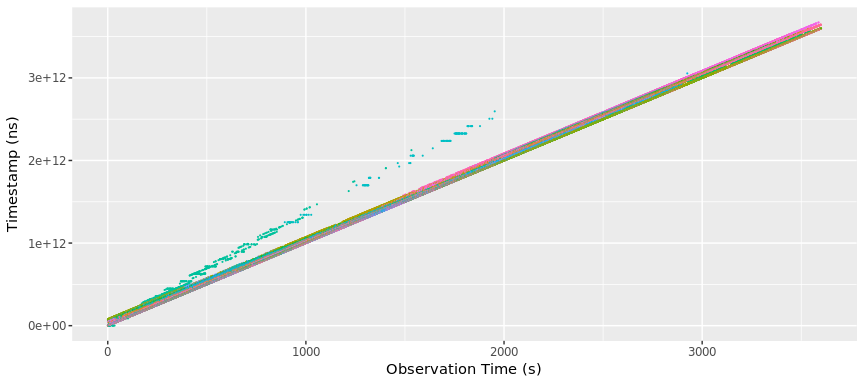

Example image of broken timestamp sensor data (in green) taken from Compition documentation (https://competition.opensky-network.org/documentation.html#datasets)

**CLASSIFCATION AND IMBALANCED DATA**

We are not planning to do anything in terms of  imbalanced data. The goal of our probelm is regression and accuracy within the RMSE of known Air Localization Data, this depends on knowing the accurate postions of the sensors. Techniques like SMOTE or ADASYN may create data that would lower our confidence interval and could lead to overfitting and wrong predictions in our localization regression.


**DISCUSSION**

After completing a Random Forest and a Linear Regression, we noticed that the Random Forest resulted in a lower MSE for all three attributes; Latitude, Longitude, and GeoAltitude. Initially, before running these two algorithms we had predicted the Linear Regression to perform better since our data is mainly quantitative. It was interesting to see the marginal increase in performance from the Random Forest.